# Kaplan-Meier Estimator

The Kaplan-Meier estimator is a non-parametric estimator of the survival function of lifetime data that can be used even in the presence of right-censoring.
It is implemented in the `KaplanMeier` class in the `stattools.survival` module.

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)

from stattools.survival import KaplanMeier

## Example: no censoring

These data are the times of remission (in weeks) of leukaemia patients in a control group, taken from Table 1.1 of Cox and Oakes (1984).

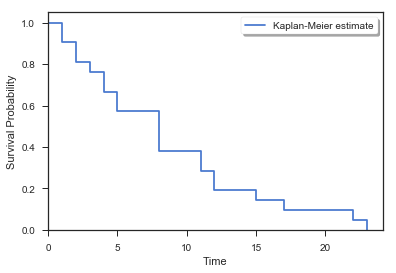

In [2]:
control = [1, 1, 2, 2, 3, 4, 4, 5, 5, 8, 8, 8, 8, 11, 11, 12, 12, 15, 17, 22, 23]

km_control = KaplanMeier().fit(time=control)

plt.figure()
km_control.plot()
plt.legend(loc="best", frameon=True, shadow=True)
plt.show()
plt.close()

## Example: right-censored data

These data are the times of remission of leukaemia patients in a treatment group, also taken from Table 1.1 of Cox and Oakes (1984).
Some of the observations are right-censored since patients dropped out of the trial before completing treatment. These instances of right-censoring are marked by `0`, while true times of remission are marked by `1`.
In the plot of the Kaplan-Meier estimate, censored times are indicated by markers on the curve.

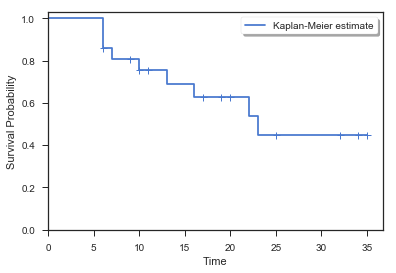

In [3]:
treatment = [6, 6, 6, 6, 7, 9, 10, 10, 11, 13, 16, 17, 19, 20, 22, 23, 25, 32, 32, 34, 35]
event = [1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]

km_treatment = KaplanMeier().fit(time=treatment, event=event)

plt.figure()
km_treatment.plot()
plt.legend(loc="best", frameon=True, shadow=True)
plt.show()
plt.close()

## Example: combined Kaplan-Meier plots

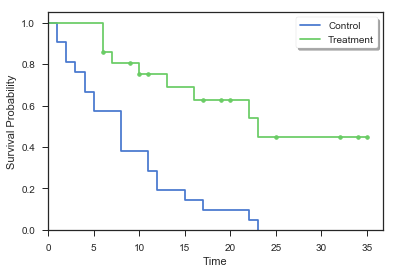

In [4]:
plt.figure()
km_control.plot(label="Control")
km_treatment.plot(label="Treatment", marker=".")
plt.legend(loc="best", frameon=True, shadow=True)
plt.show()
plt.close()

## Example: Simulated data from the gamma distribution with uniform censoring

In [5]:
rs = np.random.RandomState(0)
a = 3
scale = 1
dist = st.gamma(a=a, scale=scale)
n = 50

# True failure times
true = dist.rvs(size=n, random_state=rs)

# Random censoring times
censor = st.uniform.rvs(loc=0, scale=10, size=n, random_state=rs)

# Observed times
observed = np.minimum(true, censor)

# Failure indicator (0=censor, 1=failure)
failure = observed == true

print(f"Proportion of censored data: {1 - np.mean(failure):.1%}")

Proportion of censored data: 20.0%


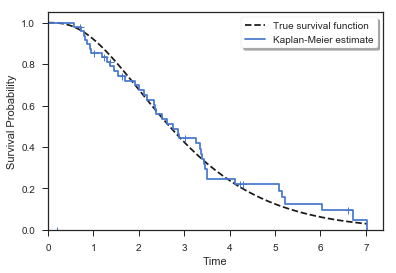

In [6]:
km = KaplanMeier()
km.fit(time=observed, event=failure)

plt.figure()
x = np.linspace(0, max(observed), num=100)
y = 1 - dist.cdf(x)
plt.plot(x, y, ls="--", c="k", label="True survival function")
km.plot()
plt.legend(loc="best", frameon=True, shadow=True)
plt.show()
plt.close()

## References

* E. L. Kaplan and P. Meier.
  "Nonparametric estimation from incomplete observations".
  Journal of the American Statistical Association, Volume 53, Issue 282 (1958), 457--481.
  ([DOI](https://doi.org/10.2307/2281868))
* D. R. Cox and D. Oakes.
  Analysis of Survival Data.
  Chapman and Hall (1984).